In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine

%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [9]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from studentsperformance',con=engine)

Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

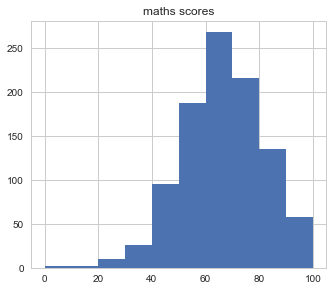

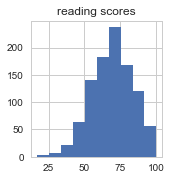

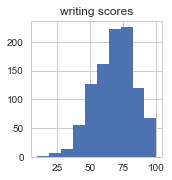

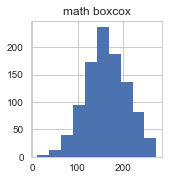

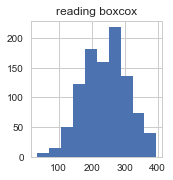

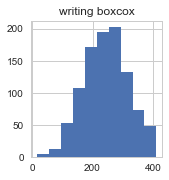

In [10]:
from scipy.stats import boxcox

math_boxcox,_ = boxcox(education_df[education_df["math score"] > 0 ] ["math score"])
reading_boxcox,_ = boxcox(education_df["reading score"])
writing_boxcox,_ = boxcox(education_df["writing score"])

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(education_df["math score"])
plt.title("maths scores")
plt.show()

plt.subplot(2, 3, 2)
plt.hist(education_df["reading score"])
plt.title("reading scores")
plt.show()

plt.subplot(2,3,3)
plt.hist(education_df["writing score"])
plt.title("writing scores")
plt.show()

plt.subplot(2,3,4)
plt.hist(math_boxcox)
plt.title("math boxcox")
plt.show()

plt.subplot(2,3,5)
plt.hist(reading_boxcox)
plt.title("reading boxcox")
plt.show()

plt.subplot(2,3,6)
plt.hist(writing_boxcox)
plt.title("writing boxcox")
plt.show()

In [11]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(education_df["math score"])
norm_stats = normaltest(education_df["math score"])

print("Jarque-Bera test statistic is {0} and the p-value is {1}".format(jb_stats[0],jb_stats[1]))
print("Normality test statistic is {0} and p value is {1}".format(norm_stats[0],norm_stats[1]))

jb_stats = jarque_bera(education_df["reading score"])
norm_stats = normaltest(education_df["reading score"])

print("Jarque-Bera test statistic is {0} and the p-value is {1}".format(jb_stats[0],jb_stats[1]))
print("Normality test statistic is {0} and p value is {1}".format(norm_stats[0],norm_stats[1]))

jb_stats = jarque_bera(education_df["writing score"])
norm_stats = normaltest(education_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistic is 15.912256686712709 and the p-value is 0.0003505075386818213
Normality test statistic is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistic is 11.383300575987892 and the p-value is 0.0033740202672214448
Normality test statistic is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


stats show non normal distribution confirmed, whereas boxcox shows normal dist.

In [12]:

jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


## Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed

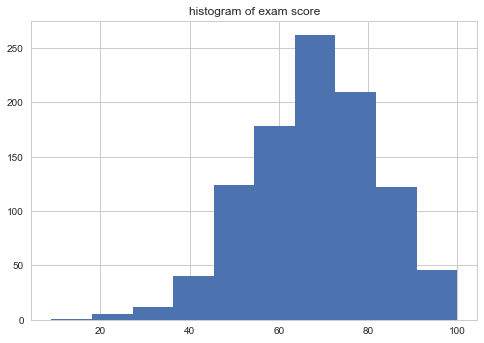

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [20]:
exam_score = (education_df["math score"] +
              education_df["reading score"] + education_df["writing score"])/3

plt.hist(exam_score)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

not normally distributed perform boxcox next

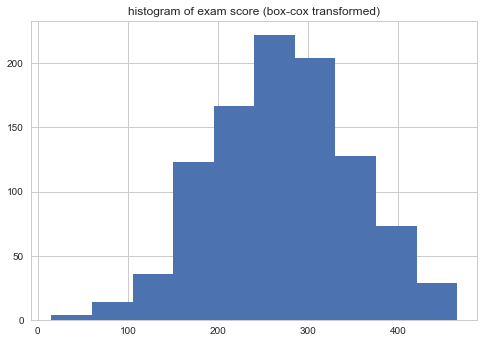

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177


In [21]:
exams_boxcox,_ = boxcox(exam_score)

plt.hist(exams_boxcox)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

## 3. Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?

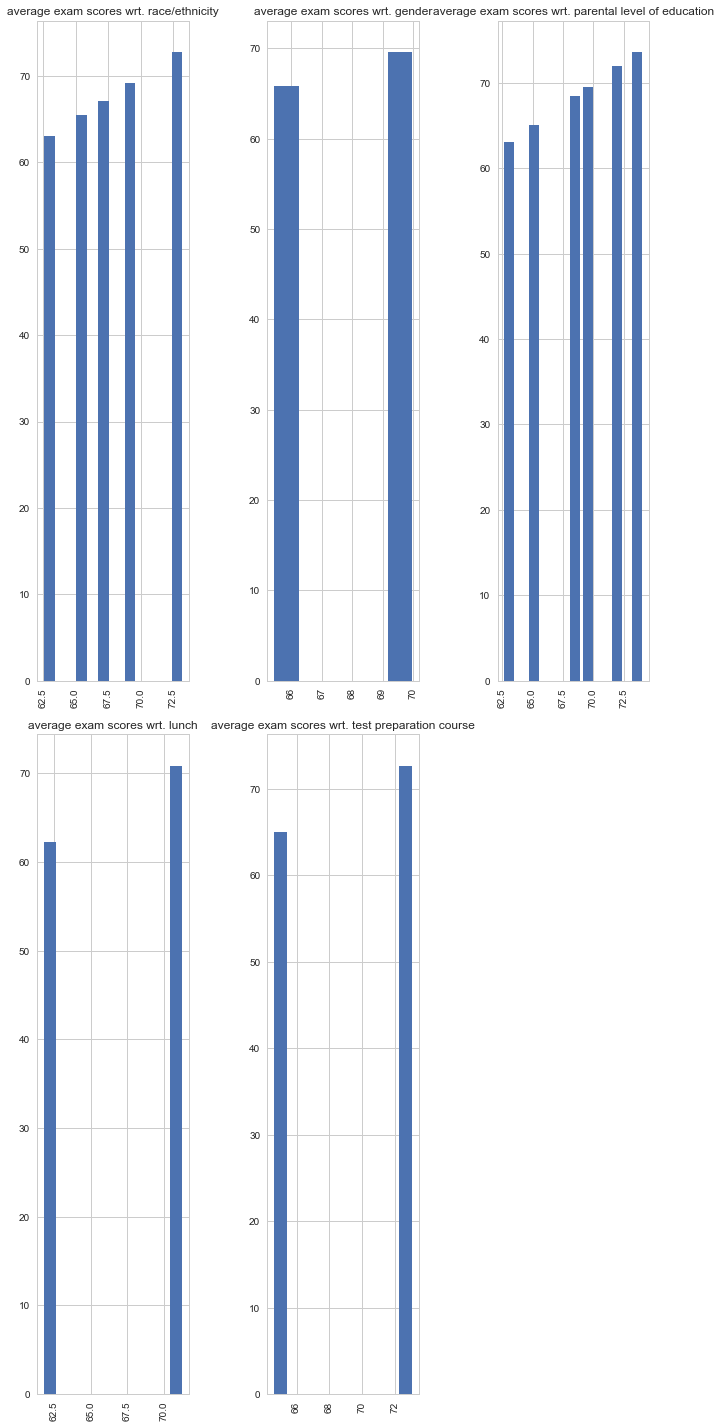

In [44]:
education_df["exam_score"] = exam_score.astype(float)

plt.figure(figsize = (10,20))

plt.subplot(2,3,1)
plt.bar(education_df.groupby("race/ethnicity")["exam_score"].mean(), education_df.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(education_df.groupby("gender")
        ["exam_score"].mean(), education_df.groupby("gender")["exam_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(education_df.groupby("parental level of education")
        ["exam_score"].mean(), education_df.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(education_df.groupby("lunch")
        ["exam_score"].mean(), education_df.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(education_df.groupby("test preparation course")
        ["exam_score"].mean(), education_df.groupby("test preparation course")["exam_score"].mean())
plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()


In [ ]:
differences across the board